In [1]:
import colorsys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.ticker as plticker
import hr_edl_data.plot as mcd_plt
import hr_edl_data.tournament as mcd_tournament

mcd_plt.set_plt_params(font_size=20)
div_color_palette = mcd_plt.diverging_color_palette()
seq_color_palette = mcd_plt.sequential_color_palette()

date = 'may10_2021'

In [2]:
data = mcd_tournament.Data.load()
data.data

game_tag sampler  seed   mode         row_alg         col_alg  \
0       goofspiel_3p    null  None  fixed             CFR             CFR   
1       goofspiel_3p    null  None  fixed             CFR       CFR_EX+IN   
2       goofspiel_3p    null  None  fixed             CFR          CFR_IN   
3       goofspiel_3p    null  None  fixed             CFR        A-EFR_IN   
4       goofspiel_3p    null  None  fixed             CFR         BPS-EFR   
...              ...     ...   ...    ...             ...             ...   
944995   tiny_hanabi    null  None    sim  TIPS-EFR_EX+IN        TIPS-EFR   
944996   tiny_hanabi    null  None    sim  TIPS-EFR_EX+IN        CSPS-EFR   
944997   tiny_hanabi    null  None    sim  TIPS-EFR_EX+IN        CFPS-EFR   
944998   tiny_hanabi    null  None    sim  TIPS-EFR_EX+IN  CFPS-EFR_EX+IN   
944999   tiny_hanabi    null  None    sim  TIPS-EFR_EX+IN  TIPS-EFR_EX+IN   

               value    t  milliseconds  
0      -2.312960e-18    0         338.0  
1      -2.312960e-18    0         284.0  
2      -2.312960e-18    0         286.0  
3      -2.312960e-18    0         347.0  
4      -2.312960e-18    0         323.0  
...              ...  ...           ...  
944995  8.500000e+00  499           0.0  
944996  8.500000e+00  499           0.0  
944997  8.500000e+00  499           0.0  
944998  8.000000e+00  499           0.0  
944999  8.000000e+00  499           0.0  

[945000 rows x 9 columns]

[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


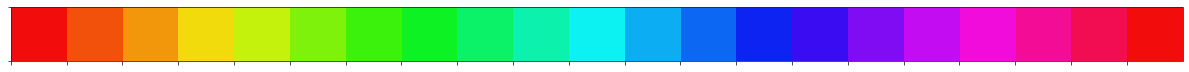

In [3]:
color_palettes = [colorsys.hls_to_rgb(f, 0.5, 0.9) for f in np.arange(0, 1.05, 0.05)]
print(np.arange(0, 1.05, 0.05))
sns.palplot(color_palettes)

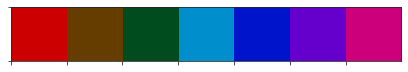

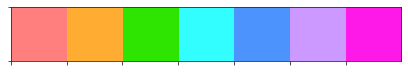

In [4]:
dark_hues = [0, 0.1, 0.4, 0.55, 0.65, 0.75, 0.9]
dark_lightness = [0.4, 0.2, 0.15, 0.4, 0.4, 0.4, 0.4]
light_hues = [1, 0.1, 0.3, 0.5, 0.6, 0.75, 0.85]
light_lightness = [0.75, 0.6, 0.45, 0.6, 0.65, 0.8, 0.55]
dark_colors = [colorsys.hls_to_rgb(h, dark_lightness[i], 1) for i, h in enumerate(dark_hues)]
sns.palplot(dark_colors)
light_colors = [colorsys.hls_to_rgb(h, light_lightness[i], 1) for i, h in enumerate(light_hues)]
sns.palplot(light_colors)

In [5]:
# Setting algorithm comparison groups
hsr_alg_comparisons = (('CFR', 'A-EFR_IN', 'CFR_IN', 'CFR_EX+IN'),)
rla_alg_comparisons = (
    ('CFR', 'A-EFR_IN', 'CFR_IN', 'CFR_EX+IN'),  # Weak algorithms
    ("BPS-EFR", "CFPS-EFR", "CSPS-EFR", 'TIPS-EFR', 'BEHAV-EFR'),  # PS algorithms
    ("CFPS-EFR", 'TIPS-EFR', "CFPS-EFR_EX+IN", 'TIPS-EFR_EX+IN'),  # PS alternatives
)
mike_alg_comparisons = (
    ('CFR', 'BPS-EFR', 'TIPS-EFR'),
)
nf_algs = ('CFR', 'CFR_IN', 'CFR_EX+IN')
alg_comparisons = rla_alg_comparisons
all_algs = set()
for alg_group in alg_comparisons:
    all_algs = all_algs.union({alg for alg in alg_group})
print(all_algs)

# Setup algorithm specific colors
cf_color_idx = 3
act_color_idx = 6
l1_ps_color_idx = 0
l2_ps_color_idx = 4
alg_color = {
    'CFR': dark_colors[cf_color_idx],
    'A-EFR_IN': dark_colors[act_color_idx],
    'CFR_IN': light_colors[cf_color_idx],
    "BPS-EFR": dark_colors[l1_ps_color_idx],
    "CFPS-EFR": light_colors[l1_ps_color_idx],
    "CSPS-EFR": dark_colors[l2_ps_color_idx],
    'TIPS-EFR': light_colors[l2_ps_color_idx],
    'BEHAV-EFR': (0, 0, 0),
    'CFR_EX+IN': dark_colors[2],
    "CFPS-EFR_EX+IN": dark_colors[1],
    'TIPS-EFR_EX+IN': dark_colors[5],
}
            
learning_curve_query_string = 'game_tag == "{game}" & mode == "{mode}"\
    & col_alg == {col_algs}\
    & row_alg == {algs}'

# Exclude algorithms not in any comparison group
data.data = data.data.query(f'col_alg == {list(all_algs)} & row_alg == {list(all_algs)}')


{'A-EFR_IN', 'TIPS-EFR', 'CFR', 'CFPS-EFR_EX+IN', 'CFR_IN', 'CSPS-EFR', 'TIPS-EFR_EX+IN', 'BPS-EFR', 'BEHAV-EFR', 'CFPS-EFR', 'CFR_EX+IN'}


In [33]:
def sharex_and_y_in_row(axes_list):
    shared_x = axes_list[0].get_shared_x_axes()
    shared_y = axes_list[0].get_shared_y_axes()
    for ax in axes_list[1:]:
        shared_x.join(axes_list[0], ax)
        shared_y.join(axes_list[0], ax)
        
def sharex_in_row(axes_list):
    for j, ax in enumerate(axes_list[1:]):
        axes_list[j - 1].sharex(ax)

def learning_curve_data(df, cumsum=True):
    df = df.pivot(index=['col_alg', 'row_alg'], columns='t', values='value')
    normalizer = 1.0
    if (cumsum):
        df = df.cumsum(axis=1)
        normalizer += df.columns.to_numpy()
    return (df.mean(level=1) / normalizer).T.sort_index(axis=1, key=mcd_tournament.alg_sort_keys)

def learning_curve_runtime_data(df):
    df_milliseconds = df.pivot(index=['col_alg', 'row_alg'], columns='t', values='milliseconds')
    return df_milliseconds.mean(level=1).T.sort_index(axis=1, key=mcd_tournament.alg_sort_keys)
    
def goofspiel_score_to_win_percentage(df):
    return (df + 1.) / 2.0 * 100

def is_goofspiel(game_tag):
    return game_tag[:len('goofspiel')] == 'goofspiel' or game_tag == 'random_goofspiel'

def is_leduc(game_tag):
    return game_tag == 'leduc'

def leduc_score_to_milli_antes(df):
    return df * 1000

avg_learning_curve_ylabel = r'avg.\ payoff'
inst_learning_curve_ylabel = 'payoff'

def leduc_learning_curve_config(df, ax, j, avg=True):
    if j == 0:
        ax.set_ylabel(
            fr'{avg_learning_curve_ylabel if avg else inst_learning_curve_ylabel} (mbb)')
    return leduc_score_to_milli_antes(df)

def goofspiel_learning_curve_config(df, ax, j, avg=True):
    if j == 0:
        ax.set_ylabel(r'avg.\ win \%' if avg else r'win \%')
    return goofspiel_score_to_win_percentage(df)

def learning_curve_figsize(games, alg_comparisons):
    return (5 + 1)/1.2 * len(alg_comparisons), 3.5/1.2 * len(games)

def learning_curves_adjust_spacing():
    plt.tight_layout(pad=0.1)
    plt.subplots_adjust(wspace=0.25, hspace=0.4)

def learning_curves_subplots(games, alg_comparisons):
    return plt.subplots(
        len(games),
        len(alg_comparisons),
        squeeze=False,
        figsize=learning_curve_figsize(games, alg_comparisons)
#         gridspec_kw={
#             'height_ratios': [1, 1, 1, 1, 1, 1, 1, 1, 1.5]}
#             'width_ratios': [0.25, 1, 1]}
    )

def learning_curves_legend(ax, ncol=2):
    ax.legend(
        ncol=ncol,
        fontsize='x-small',
        columnspacing=0.5,
        labelspacing=0.25,
        handletextpad=0.4,
        handlelength=0.5)

def learning_curves_set_ticks(ax, y_only=False):
    if not y_only:
        loc = plticker.MultipleLocator(base=100)
        ax.xaxis.set_major_locator(loc)
    start, end = ax.get_ylim()
    loc = plticker.MultipleLocator(base=(end - start) / 4.0)
    ax.yaxis.set_major_locator(loc)


In [7]:
data.games()

['leduc',
 'goofspiel',
 'goofspiel_ascending',
 'random_goofspiel',
 'goofspiel_3p',
 'goofspiel_ascending_3p',
 'sheriff',
 'tiny_bridge',
 'tiny_hanabi']

In [8]:
_df = learning_curve_runtime_data(
data.data.query(
learning_curve_query_string.format(
    game='leduc',
    mode='fixed',
    algs=list(all_algs),
    col_algs=list(all_algs))
))
_df.cumsum()

row_alg  A-EFR_IN     CFR  CFR_IN  CFR_EX+IN  BPS-EFR  CFPS-EFR  \
t                                                                 
0            20.6    53.7    21.6       21.7     20.1      21.0   
1            28.7    62.6    30.8       31.0     27.9      30.0   
2            40.0    73.5    42.5       43.2     38.1      44.2   
3            51.1    85.5    55.1       57.9     49.0      56.8   
4            60.9    95.6    65.7       68.4     58.5      67.7   
..            ...     ...     ...        ...      ...       ...   
495        6013.0  5859.0  6309.6     6400.5   5909.7    6436.1   
496        6024.6  5870.3  6321.8     6413.2   5921.4    6449.5   
497        6035.3  5881.6  6333.7     6425.6   5932.6    6461.9   
498        6046.6  5894.4  6345.5     6437.9   5944.2    6474.5   
499        6047.7  5896.8  6348.4     6441.0   5946.5    6477.5   

row_alg  CFPS-EFR_EX+IN  CSPS-EFR  TIPS-EFR  TIPS-EFR_EX+IN  
t                                                            
0                  21.7      21.9      21.3            21.9  
1                  31.5      30.5      29.6            31.1  
2                  45.8      42.9      41.4            46.1  
3                  60.7      55.0      56.3            58.6  
4                  71.9      66.2      66.7            69.9  
..                  ...       ...       ...             ...  
495              6590.9    6534.7    6486.5          6658.0  
496              6603.4    6547.6    6499.4          6670.9  
497              6616.2    6559.8    6512.5          6684.6  
498              6629.0    6572.0    6525.0          6697.2  
499              6632.3    6574.9    6528.0          6700.1  

[500 rows x 10 columns]

leduc
goofspiel
goofspiel_ascending
random_goofspiel
goofspiel_3p
goofspiel_ascending_3p
sheriff
tiny_bridge
tiny_hanabi


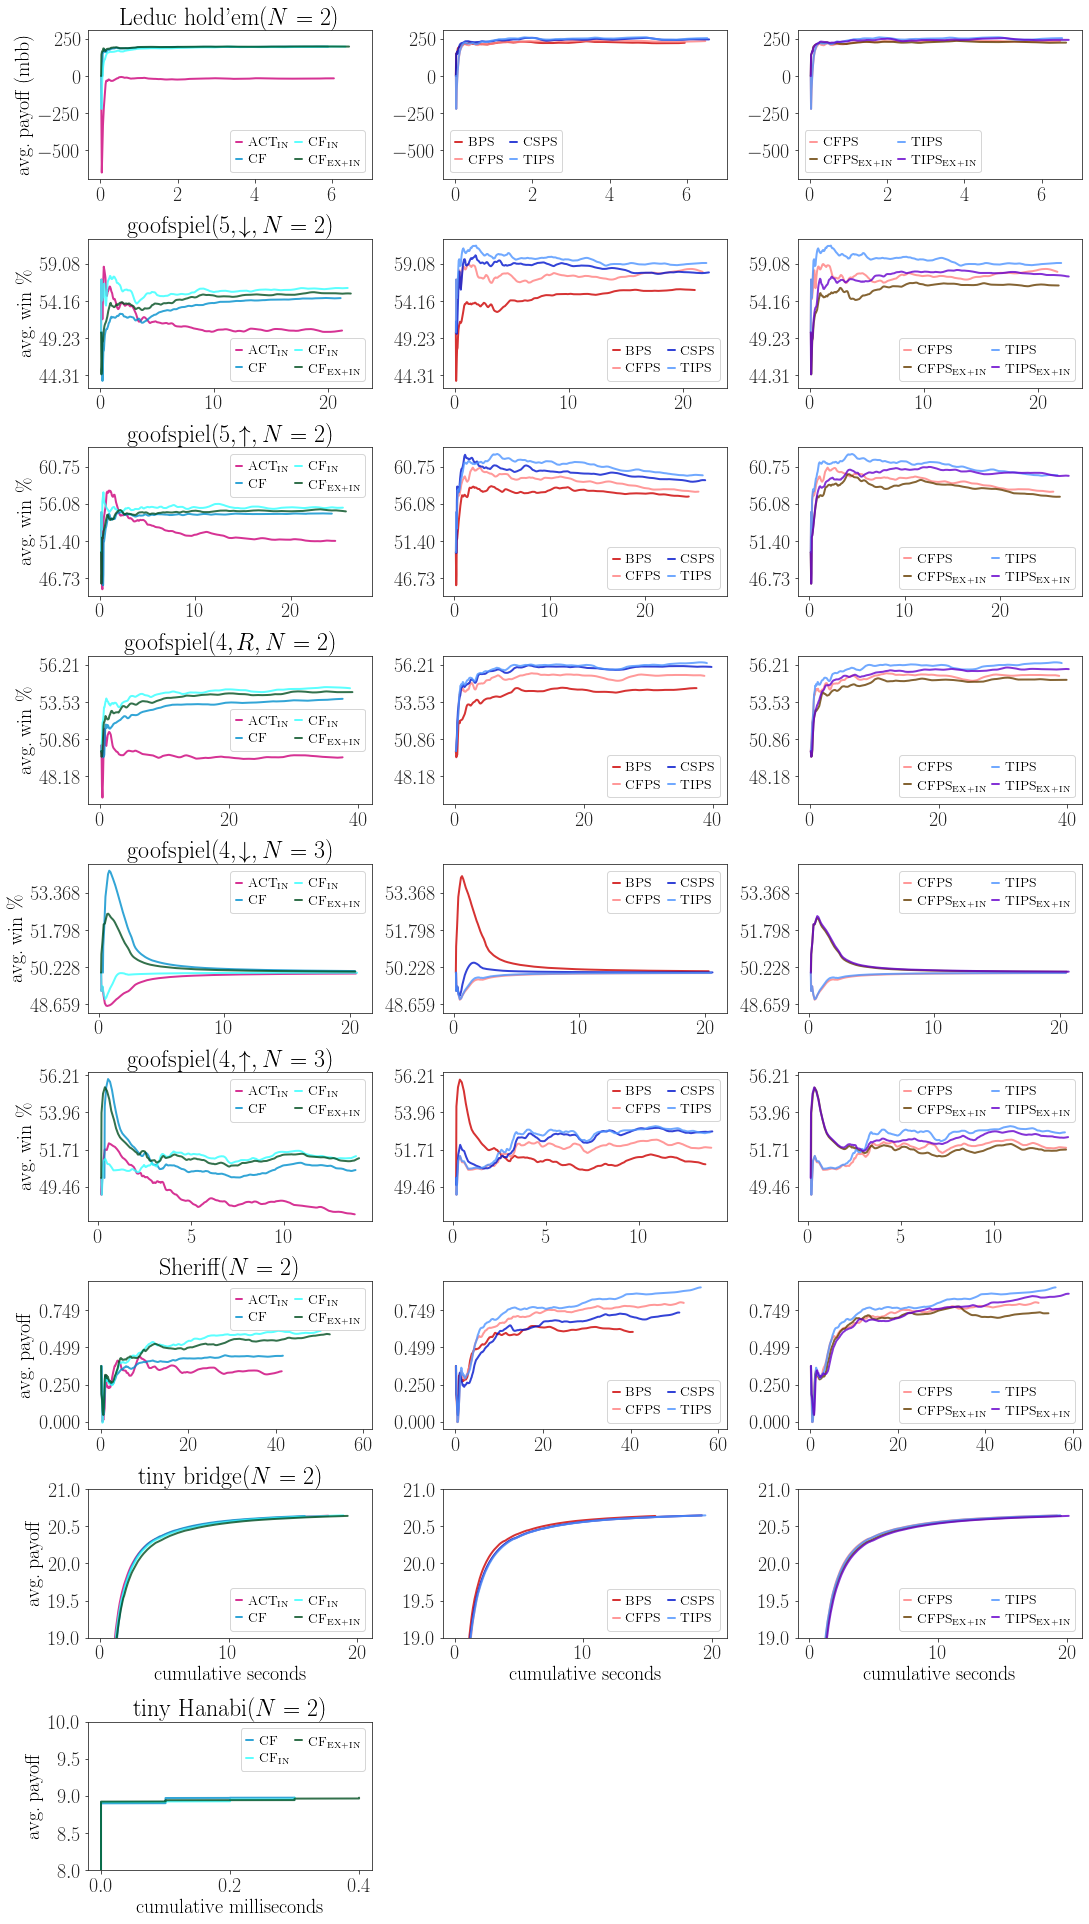

In [34]:
# Temporary test of runtime figure
ylim_by_game = {
    'tiny_bridge': (19, 21),
    'tiny_hanabi': (8, 10),
}
games = data.games()
# games = ['leduc', 'tiny_hanabi']
fig, axes_list = learning_curves_subplots(games, alg_comparisons)
for i, game_tag in enumerate(
    sorted(games, key=mcd_tournament.game_sort_key)
):
    print(game_tag)
    sharex_and_y_in_row(axes_list[i, :])
    time_scale = 1000.
    if game_tag == 'tiny_hanabi':
        _alg_comparisons = [nf_algs]
        axes_list[i, 0].set_xlabel('cumulative milliseconds')
        for ax in axes_list[i, 1:]:
            ax.set_axis_off()
        time_scale = 1.
    else:
        _alg_comparisons = alg_comparisons
    for j, alg_group in enumerate(_alg_comparisons):
        ax = axes_list[i, j]
        _df = learning_curve_data(
            data.data.query(
                learning_curve_query_string.format(
                    game=game_tag,
                    mode='fixed',
                    algs=alg_group,
                    col_algs=list(all_algs))))
        if is_leduc(game_tag):
            _df = leduc_learning_curve_config(_df, ax, j)
        elif is_goofspiel(game_tag):
            _df = goofspiel_learning_curve_config(_df, ax, j)
        elif j == 0:
            ax.set_ylabel(avg_learning_curve_ylabel)
            
        _df_runtime = learning_curve_runtime_data(
            data.data.query(
                learning_curve_query_string.format(
                    game=game_tag,
                    mode='fixed',
                    algs=alg_group,
                    col_algs=list(all_algs)))).cumsum()
        for alg in _df.columns:
            ax.plot(
                _df_runtime[alg] / time_scale,
                _df[alg],
                lw=2,
                alpha=0.8,
                label=mcd_tournament.alg_label(alg),
                color=alg_color[alg]
            )
        if game_tag in ylim_by_game:
            ax.set_ylim(ylim_by_game[game_tag])
        learning_curves_legend(ax)
    axes_list[i, 0].set_title(mcd_tournament.game_label(game_tag))
    for ax in axes_list[i, :]:
        learning_curves_set_ticks(ax, y_only=True)
for ax in axes_list[-2, 0:]:
    ax.set_xlabel('cumulative seconds')
learning_curves_adjust_spacing()
# [left, bottom, width, height] Bbox
pos = list(axes_list[-1, 0].get_position().bounds)
pos[1] *= 0.5
axes_list[-1, 0].set_position(pos)
# plt.savefig(f'../results/runtime_learning_curves.fixed.{date}.pdf')

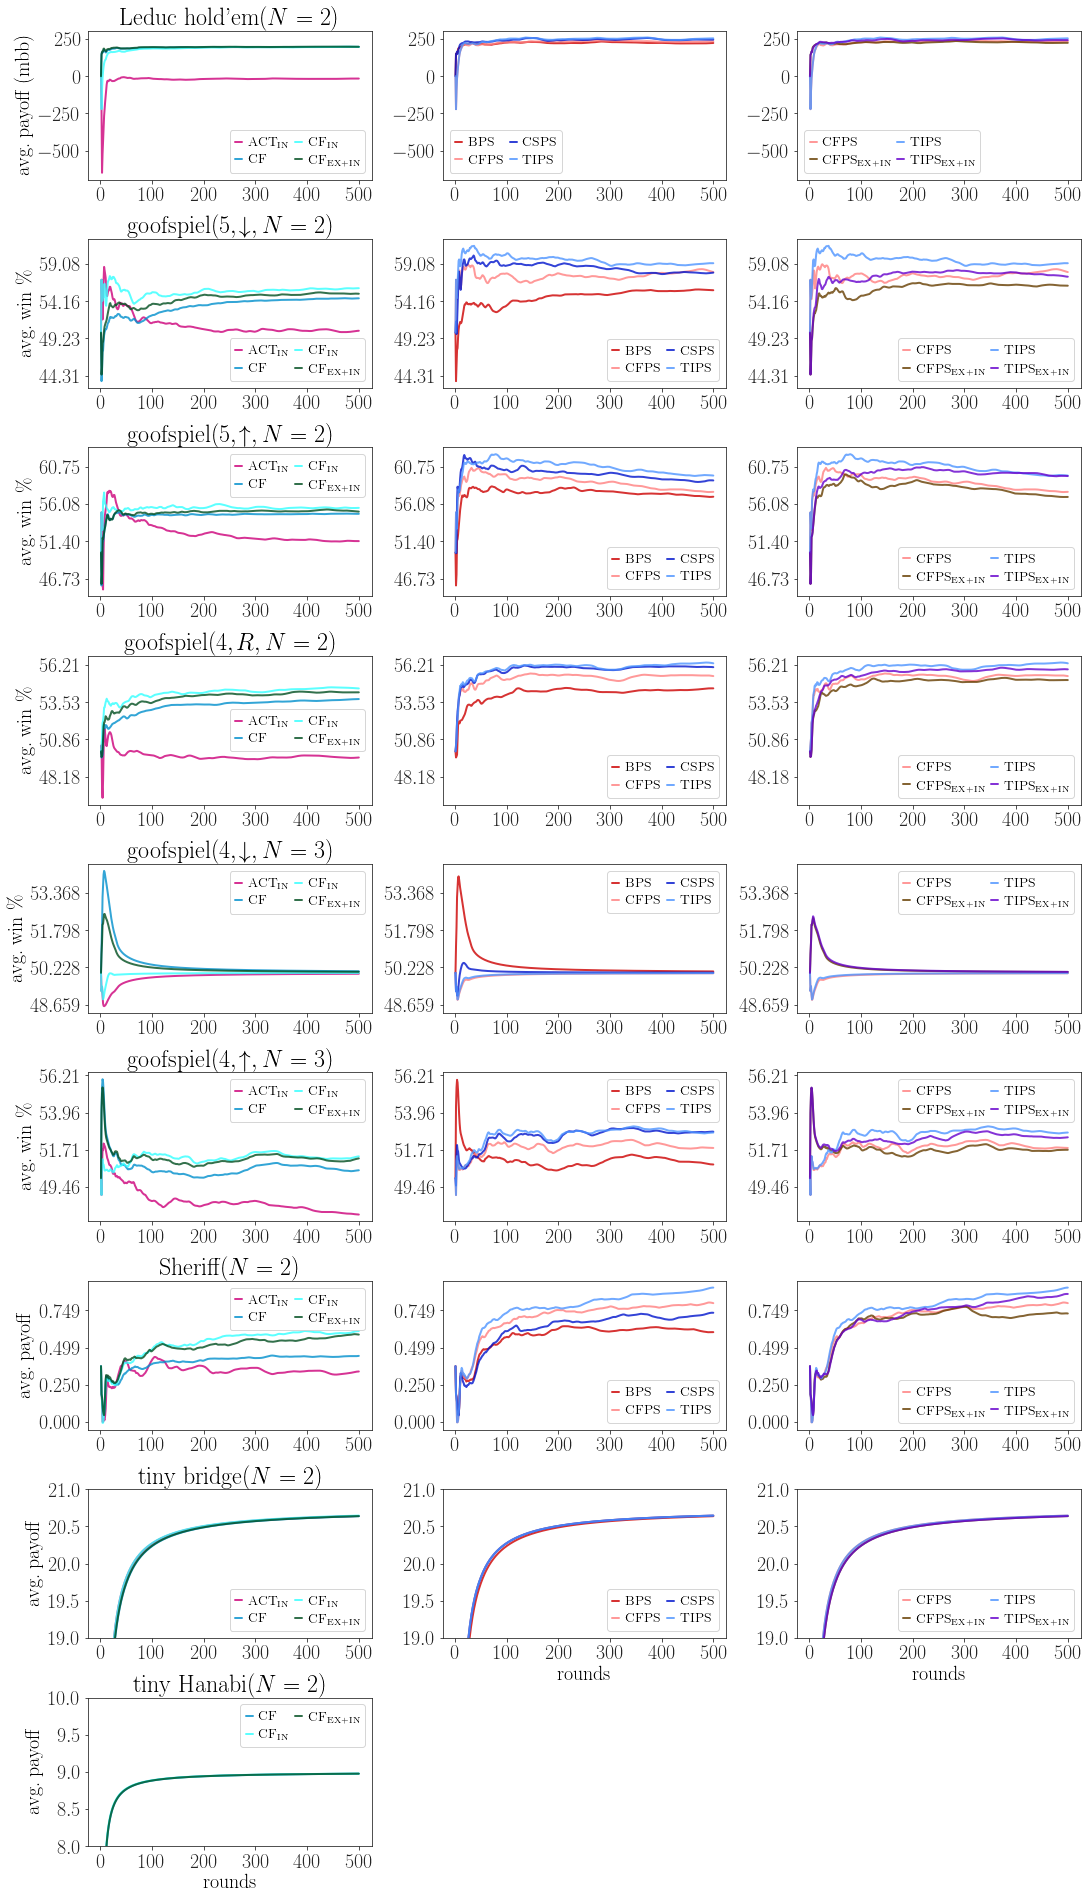

In [64]:
ylim_by_game = {
    'tiny_bridge': (19, 21),
    'tiny_hanabi': (8, 10),
}
games = data.games()
fig, axes_list = learning_curves_subplots(games, alg_comparisons)
for i, game_tag in enumerate(sorted(games, key=mcd_tournament.game_sort_key)):
    sharex_and_y_in_row(axes_list[i, :])
    if game_tag == 'tiny_hanabi':
        _alg_comparisons = [nf_algs]
        axes_list[i, 0].set_xlabel('rounds')
        for ax in axes_list[i, 1:]:
            ax.set_axis_off()
    else:
        _alg_comparisons = alg_comparisons
    for j, alg_group in enumerate(_alg_comparisons):
        ax = axes_list[i, j]
        _df = learning_curve_data(
            data.data.query(
                learning_curve_query_string.format(
                    game=game_tag,
                    mode='fixed',
                    algs=alg_group,
                    col_algs=list(all_algs))))
        if is_leduc(game_tag):
            _df = leduc_learning_curve_config(_df, ax, j)
        elif is_goofspiel(game_tag):
            _df = goofspiel_learning_curve_config(_df, ax, j)
        elif j == 0:
            ax.set_ylabel(avg_learning_curve_ylabel)
        for alg in _df.columns:
            ax.plot(
                _df.index.to_numpy() + 1.0,
                _df[alg],
                lw=2,
                alpha=0.8,
                label=mcd_tournament.alg_label(alg),
                color=alg_color[alg]
            )
        if game_tag in ylim_by_game:
            ax.set_ylim(ylim_by_game[game_tag])
        learning_curves_legend(ax)
    axes_list[i, 0].set_title(mcd_tournament.game_label(game_tag))
    for ax in axes_list[i, :]:
        learning_curves_set_ticks(ax)
for ax in axes_list[-2, 1:]:
    ax.set_xlabel('rounds')
learning_curves_adjust_spacing()
# plt.savefig(f'../results/learning_curves.fixed.{date}.pdf')

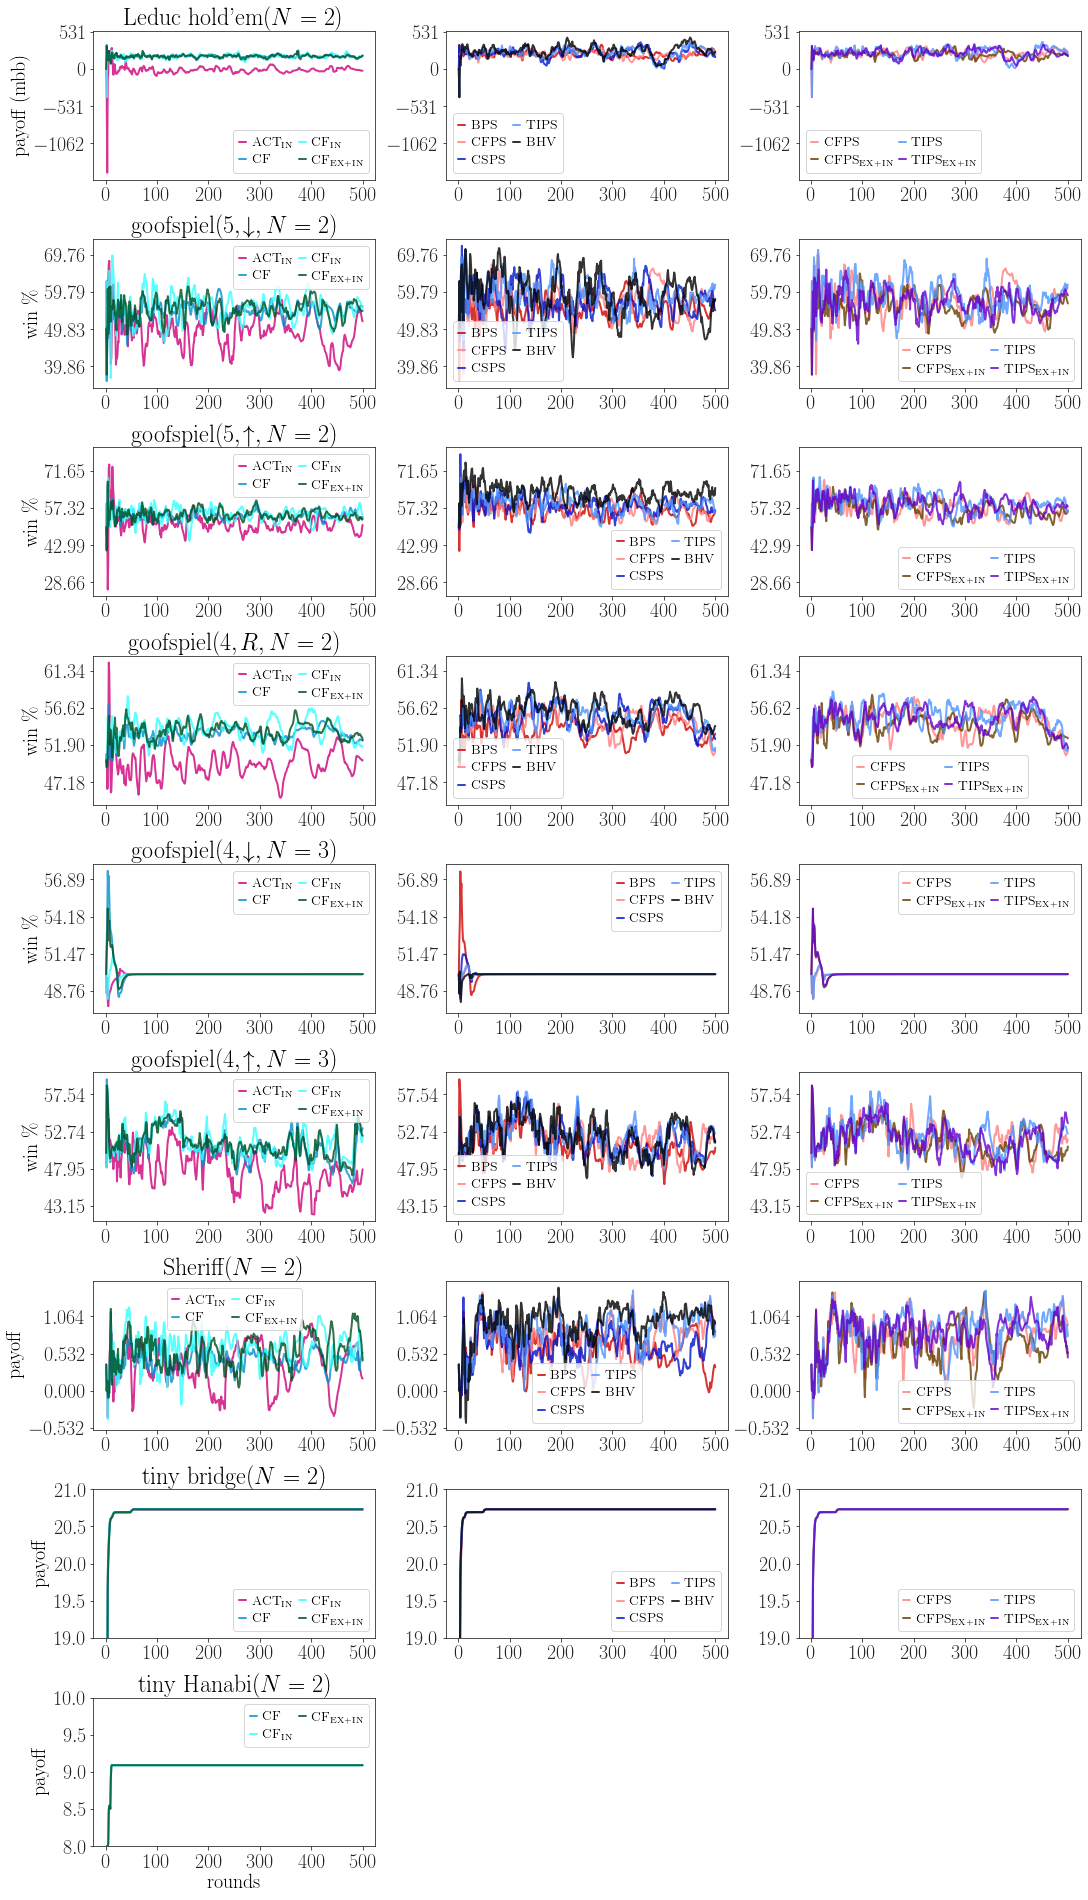

In [8]:
# ylim_by_game = {
# }

games = data.games()
fig, axes_list = learning_curves_subplots(games, alg_comparisons)
for i, game_tag in enumerate(sorted(games, key=mcd_tournament.game_sort_key)):
    sharex_and_y_in_row(axes_list[i, :])
    if game_tag == 'tiny_hanabi':
        _alg_comparisons = [nf_algs]
        axes_list[i, 0].set_xlabel('rounds')
        for ax in axes_list[i, 1:]:
            ax.set_axis_off()
    else:
        _alg_comparisons = alg_comparisons
    for j, alg_group in enumerate(_alg_comparisons):
        ax = axes_list[i, j]
        _df = learning_curve_data(
            data.data.query(
                learning_curve_query_string.format(
                    game=game_tag,
                    mode='fixed',
                    algs=alg_group,
                    col_algs=list(all_algs))),
            False)
        if is_leduc(game_tag):
            _df = leduc_learning_curve_config(_df, ax, j, avg=False)
        elif is_goofspiel(game_tag):
            _df = goofspiel_learning_curve_config(_df, ax, j, avg=False)
        elif j == 0:
            ax.set_ylabel(inst_learning_curve_ylabel)
        for alg in _df.columns:
            ax.plot(
                _df.index.to_numpy() + 1.0,
                _df[alg],
                lw=2,
                alpha=0.8,
                label=mcd_tournament.alg_label(alg),
                color=alg_color[alg]
            )
        if game_tag in ylim_by_game:
            ax.set_ylim(ylim_by_game[game_tag])
        learning_curves_legend(ax)
    axes_list[i, 0].set_title(mcd_tournament.game_label(game_tag))
    for ax in axes_list[i, :]:
        learning_curves_set_ticks(ax)
for ax in axes_list[-1, :]:
    ax.set_xlabel('rounds')
learning_curves_adjust_spacing()
plt.savefig(f'../results/learning_curves.fixed.inst.{date}.pdf')

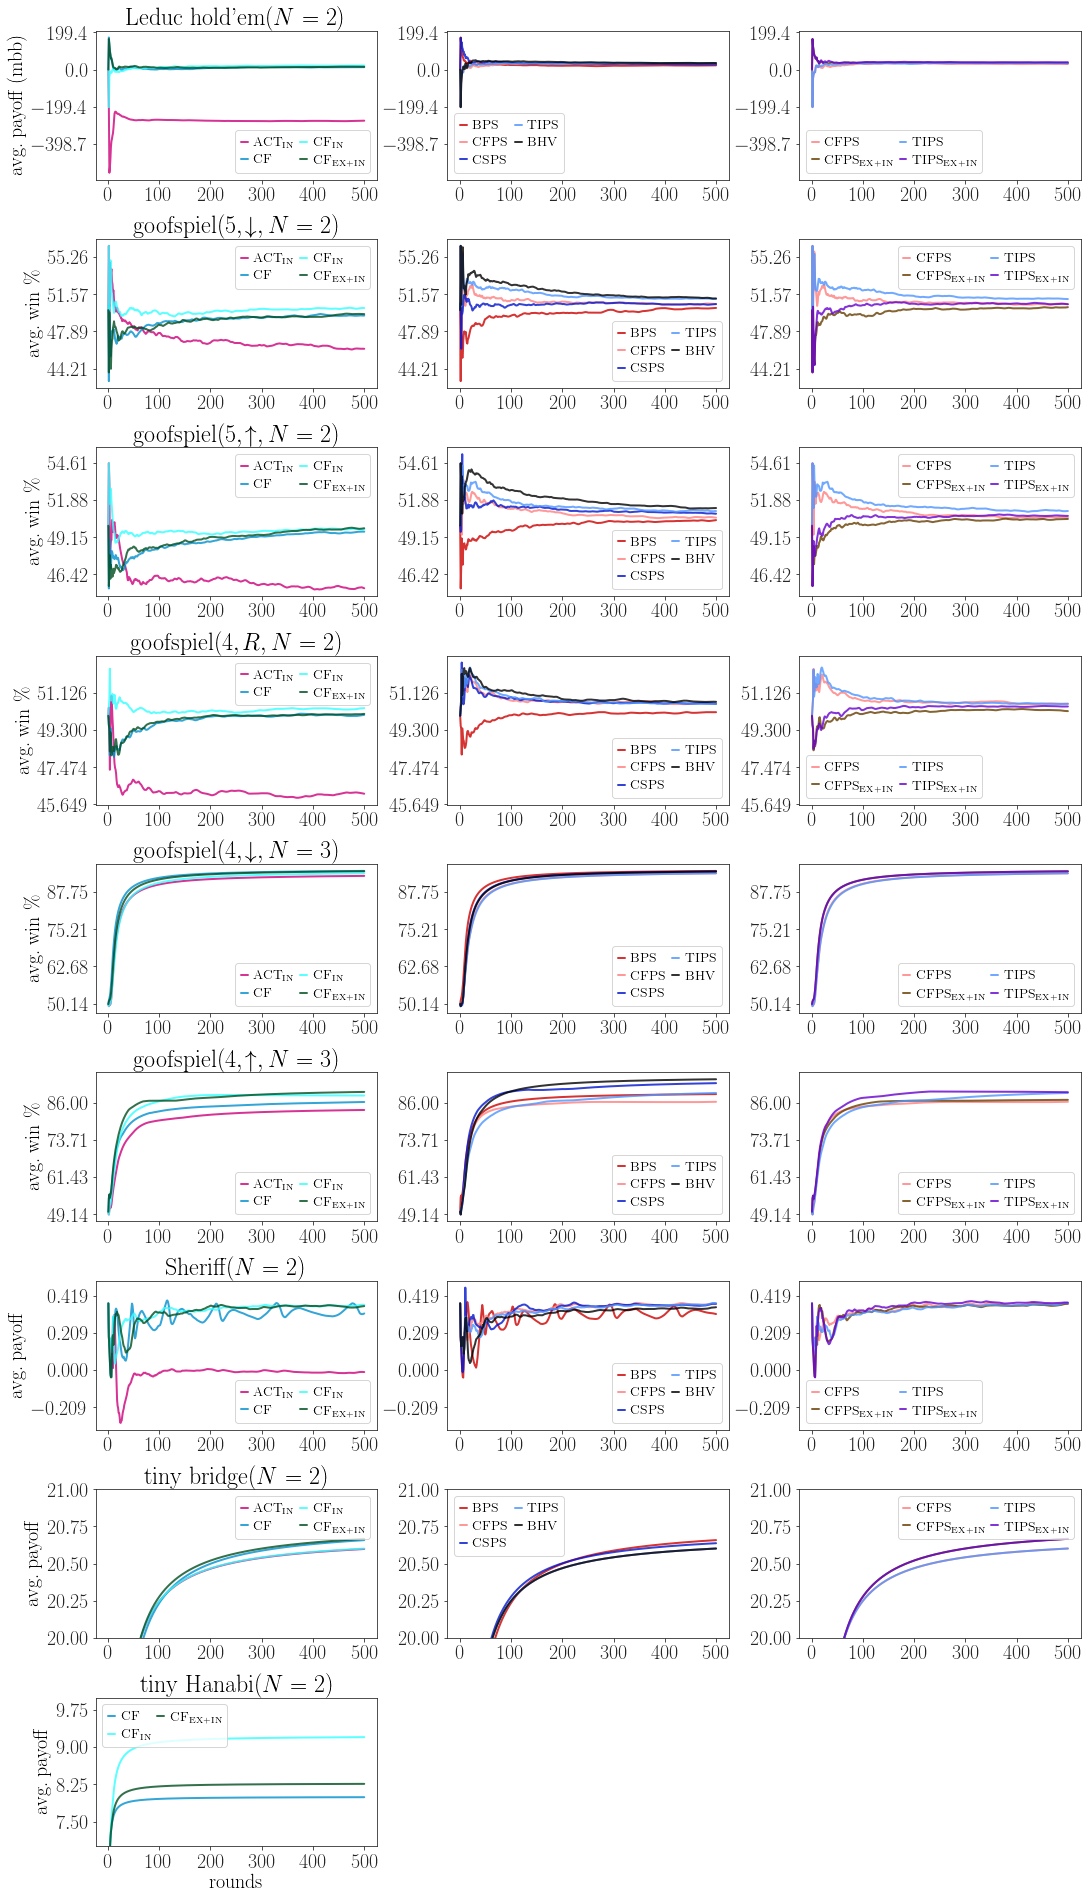

In [9]:
ylim_by_game = {
    'tiny_bridge': (20, 21),
    'tiny_hanabi': (7, 10),
}

games = data.games()
fig, axes_list = learning_curves_subplots(games, alg_comparisons)
for i, game_tag in enumerate(sorted(games, key=mcd_tournament.game_sort_key)):
    sharex_and_y_in_row(axes_list[i, :])
    if game_tag == 'tiny_hanabi':
        _alg_comparisons = [nf_algs]
        axes_list[i, 0].set_xlabel('rounds')
        for ax in axes_list[i, 1:]:
            ax.set_axis_off()
    else:
        _alg_comparisons = alg_comparisons
    for j, alg_group in enumerate(_alg_comparisons):
        ax = axes_list[i, j]
        _df = learning_curve_data(
            data.data.query(
                learning_curve_query_string.format(
                    game=game_tag,
                    mode='sim',
                    algs=alg_group,
                    col_algs=list(all_algs))))
        if is_leduc(game_tag):
            _df = leduc_learning_curve_config(_df, ax, j)
        elif is_goofspiel(game_tag):
            _df = goofspiel_learning_curve_config(_df, ax, j)
        elif j == 0:
            ax.set_ylabel(avg_learning_curve_ylabel)
        for alg in _df.columns:
            ax.plot(
                _df.index.to_numpy() + 1.0,
                _df[alg],
                lw=2,
                alpha=0.8,
                label=mcd_tournament.alg_label(alg),
                color=alg_color[alg]
            )
        if game_tag in ylim_by_game:
            ax.set_ylim(ylim_by_game[game_tag])
        learning_curves_legend(ax)
    axes_list[i, 0].set_title(mcd_tournament.game_label(game_tag))
    for ax in axes_list[i, :]:
        learning_curves_set_ticks(ax)
for ax in axes_list[-1, :]:
    ax.set_xlabel('rounds')
learning_curves_adjust_spacing()
plt.savefig(f'../results/learning_curves.sim.{date}.pdf')

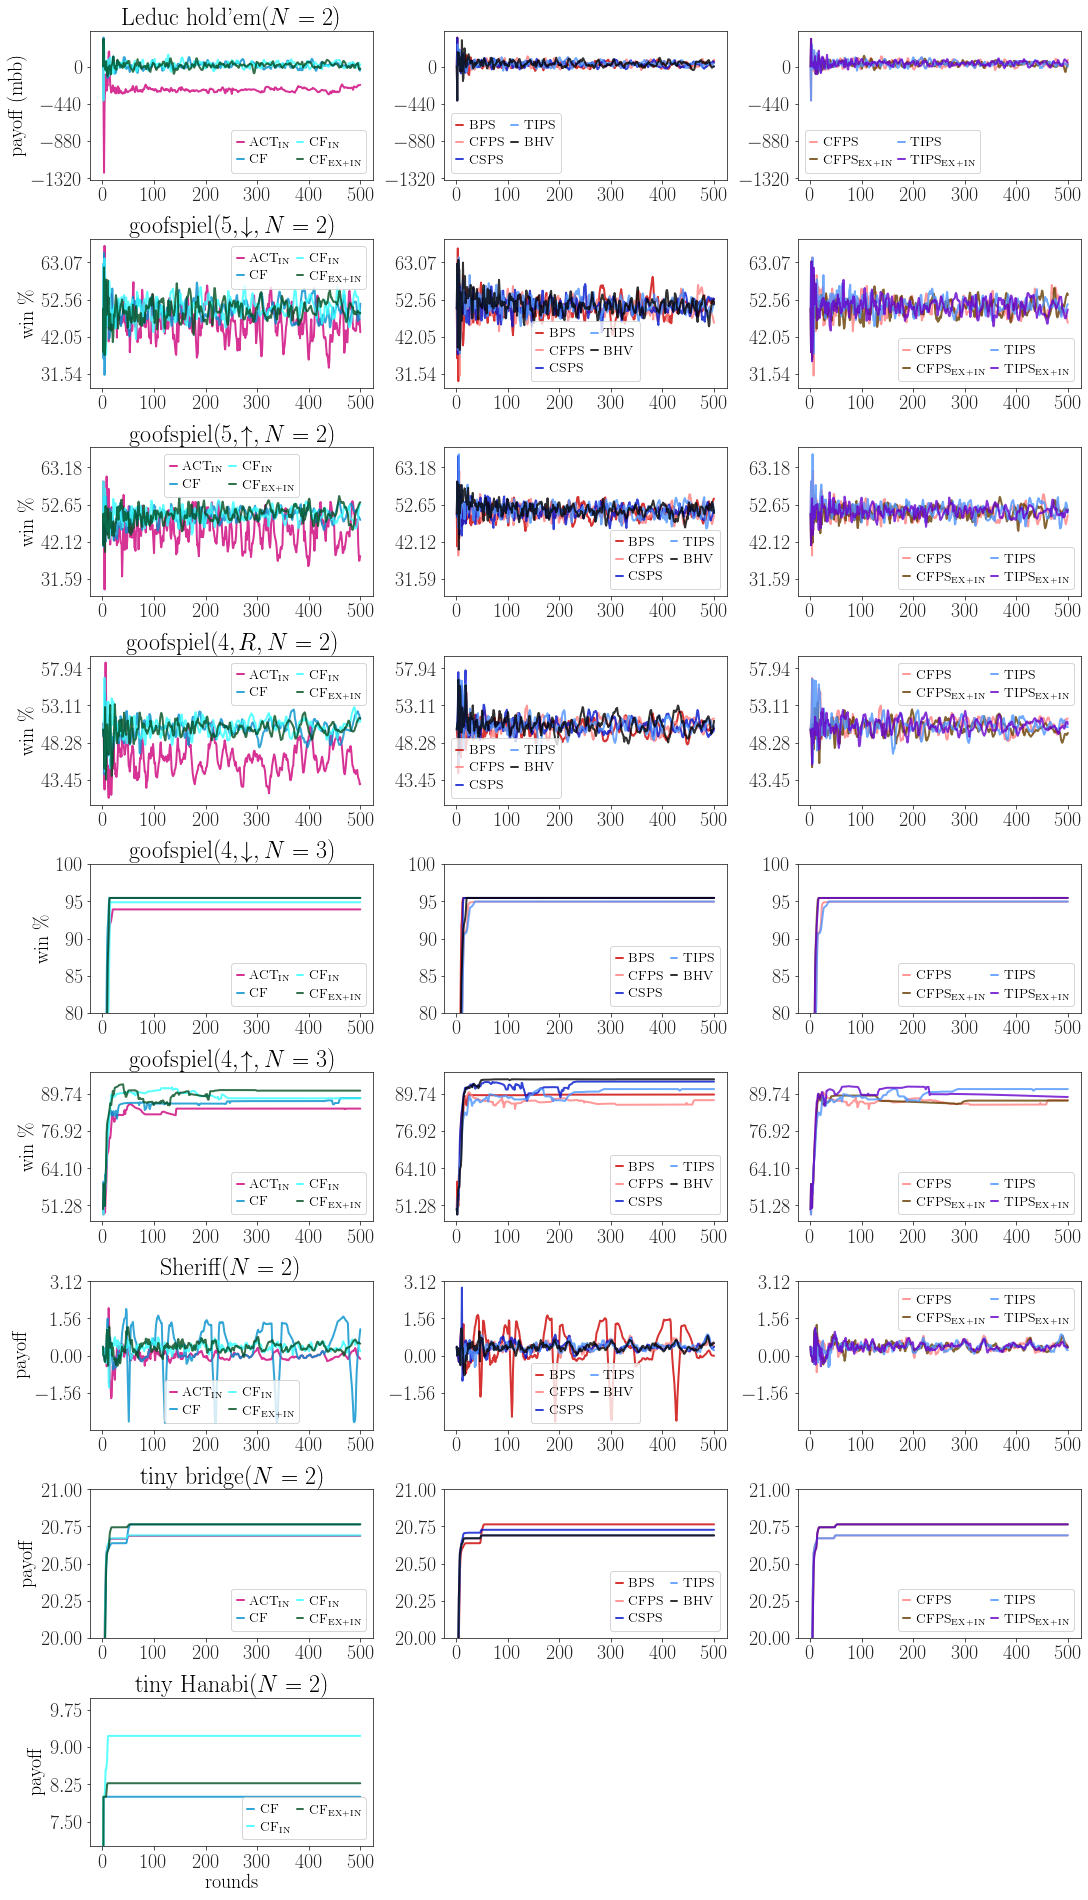

In [10]:
ylim_by_game = {
    'goofspiel_3p': (80, 100),
    'tiny_bridge': (20, 21),
    'tiny_hanabi': (7, 10),
}

games = data.games()
fig, axes_list = learning_curves_subplots(games, alg_comparisons)
for i, game_tag in enumerate(sorted(games, key=mcd_tournament.game_sort_key)):
    sharex_and_y_in_row(axes_list[i, :])
    if game_tag == 'tiny_hanabi':
        _alg_comparisons = [nf_algs]
        axes_list[i, 0].set_xlabel('rounds')
        for ax in axes_list[i, 1:]:
            ax.set_axis_off()
    else:
        _alg_comparisons = alg_comparisons
    for j, alg_group in enumerate(_alg_comparisons):
        ax = axes_list[i, j]
        _df = learning_curve_data(
            data.data.query(
                learning_curve_query_string.format(
                    game=game_tag,
                    mode='sim',
                    algs=alg_group,
                    col_algs=list(all_algs))),
            False)
        if is_leduc(game_tag):
            _df = leduc_learning_curve_config(_df, ax, j, avg=False)
        elif is_goofspiel(game_tag):
            _df = goofspiel_learning_curve_config(_df, ax, j, avg=False)
        elif j == 0:
            ax.set_ylabel(inst_learning_curve_ylabel)
        for alg in _df.columns:
            ax.plot(
                _df.index.to_numpy() + 1.0,
                _df[alg],
                lw=2,
                alpha=0.8,
                label=mcd_tournament.alg_label(alg),
                color=alg_color[alg]
            )
        if game_tag in ylim_by_game:
            ax.set_ylim(ylim_by_game[game_tag])
        learning_curves_legend(ax)
    axes_list[i, 0].set_title(mcd_tournament.game_label(game_tag))
    for ax in axes_list[i, :]:
        learning_curves_set_ticks(ax)
for ax in axes_list[-1, :]:
    ax.set_xlabel('rounds')
learning_curves_adjust_spacing()
plt.savefig(f'../results/learning_curves.sim.inst.{date}.pdf')

leduc
goofspiel
goofspiel_ascending
random_goofspiel
goofspiel_3p
goofspiel_ascending_3p
sheriff
tiny_bridge
tiny_hanabi


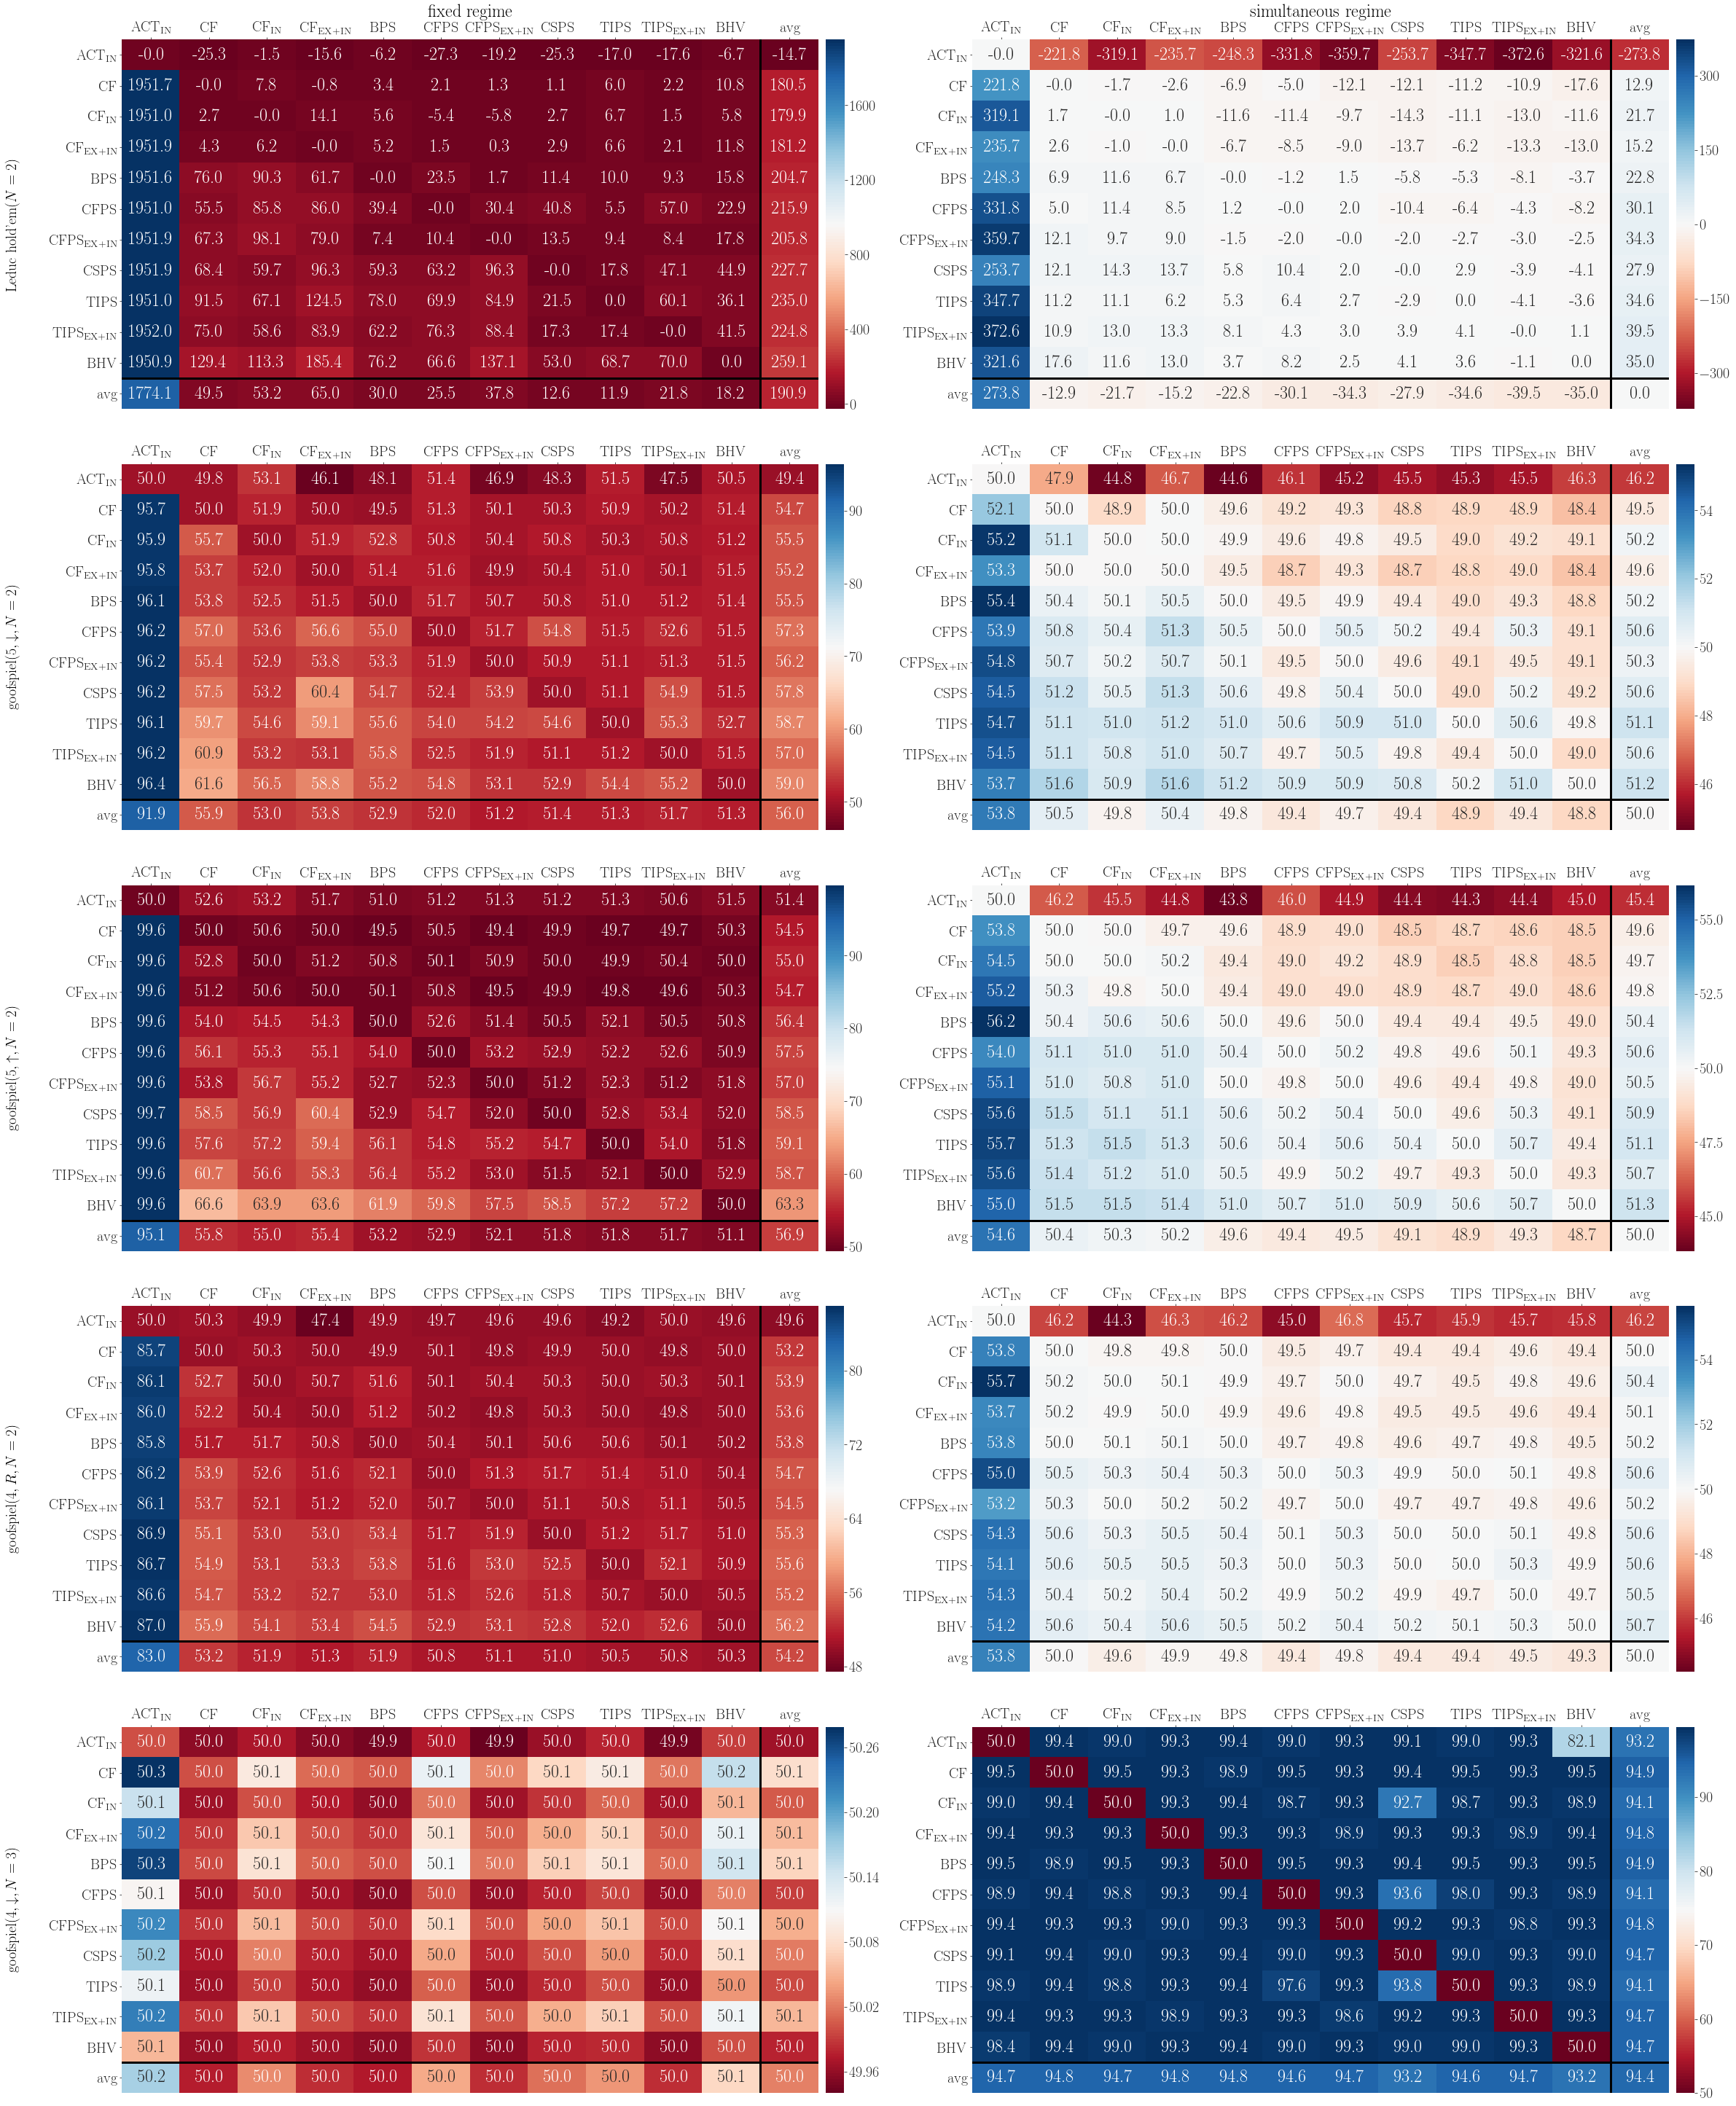

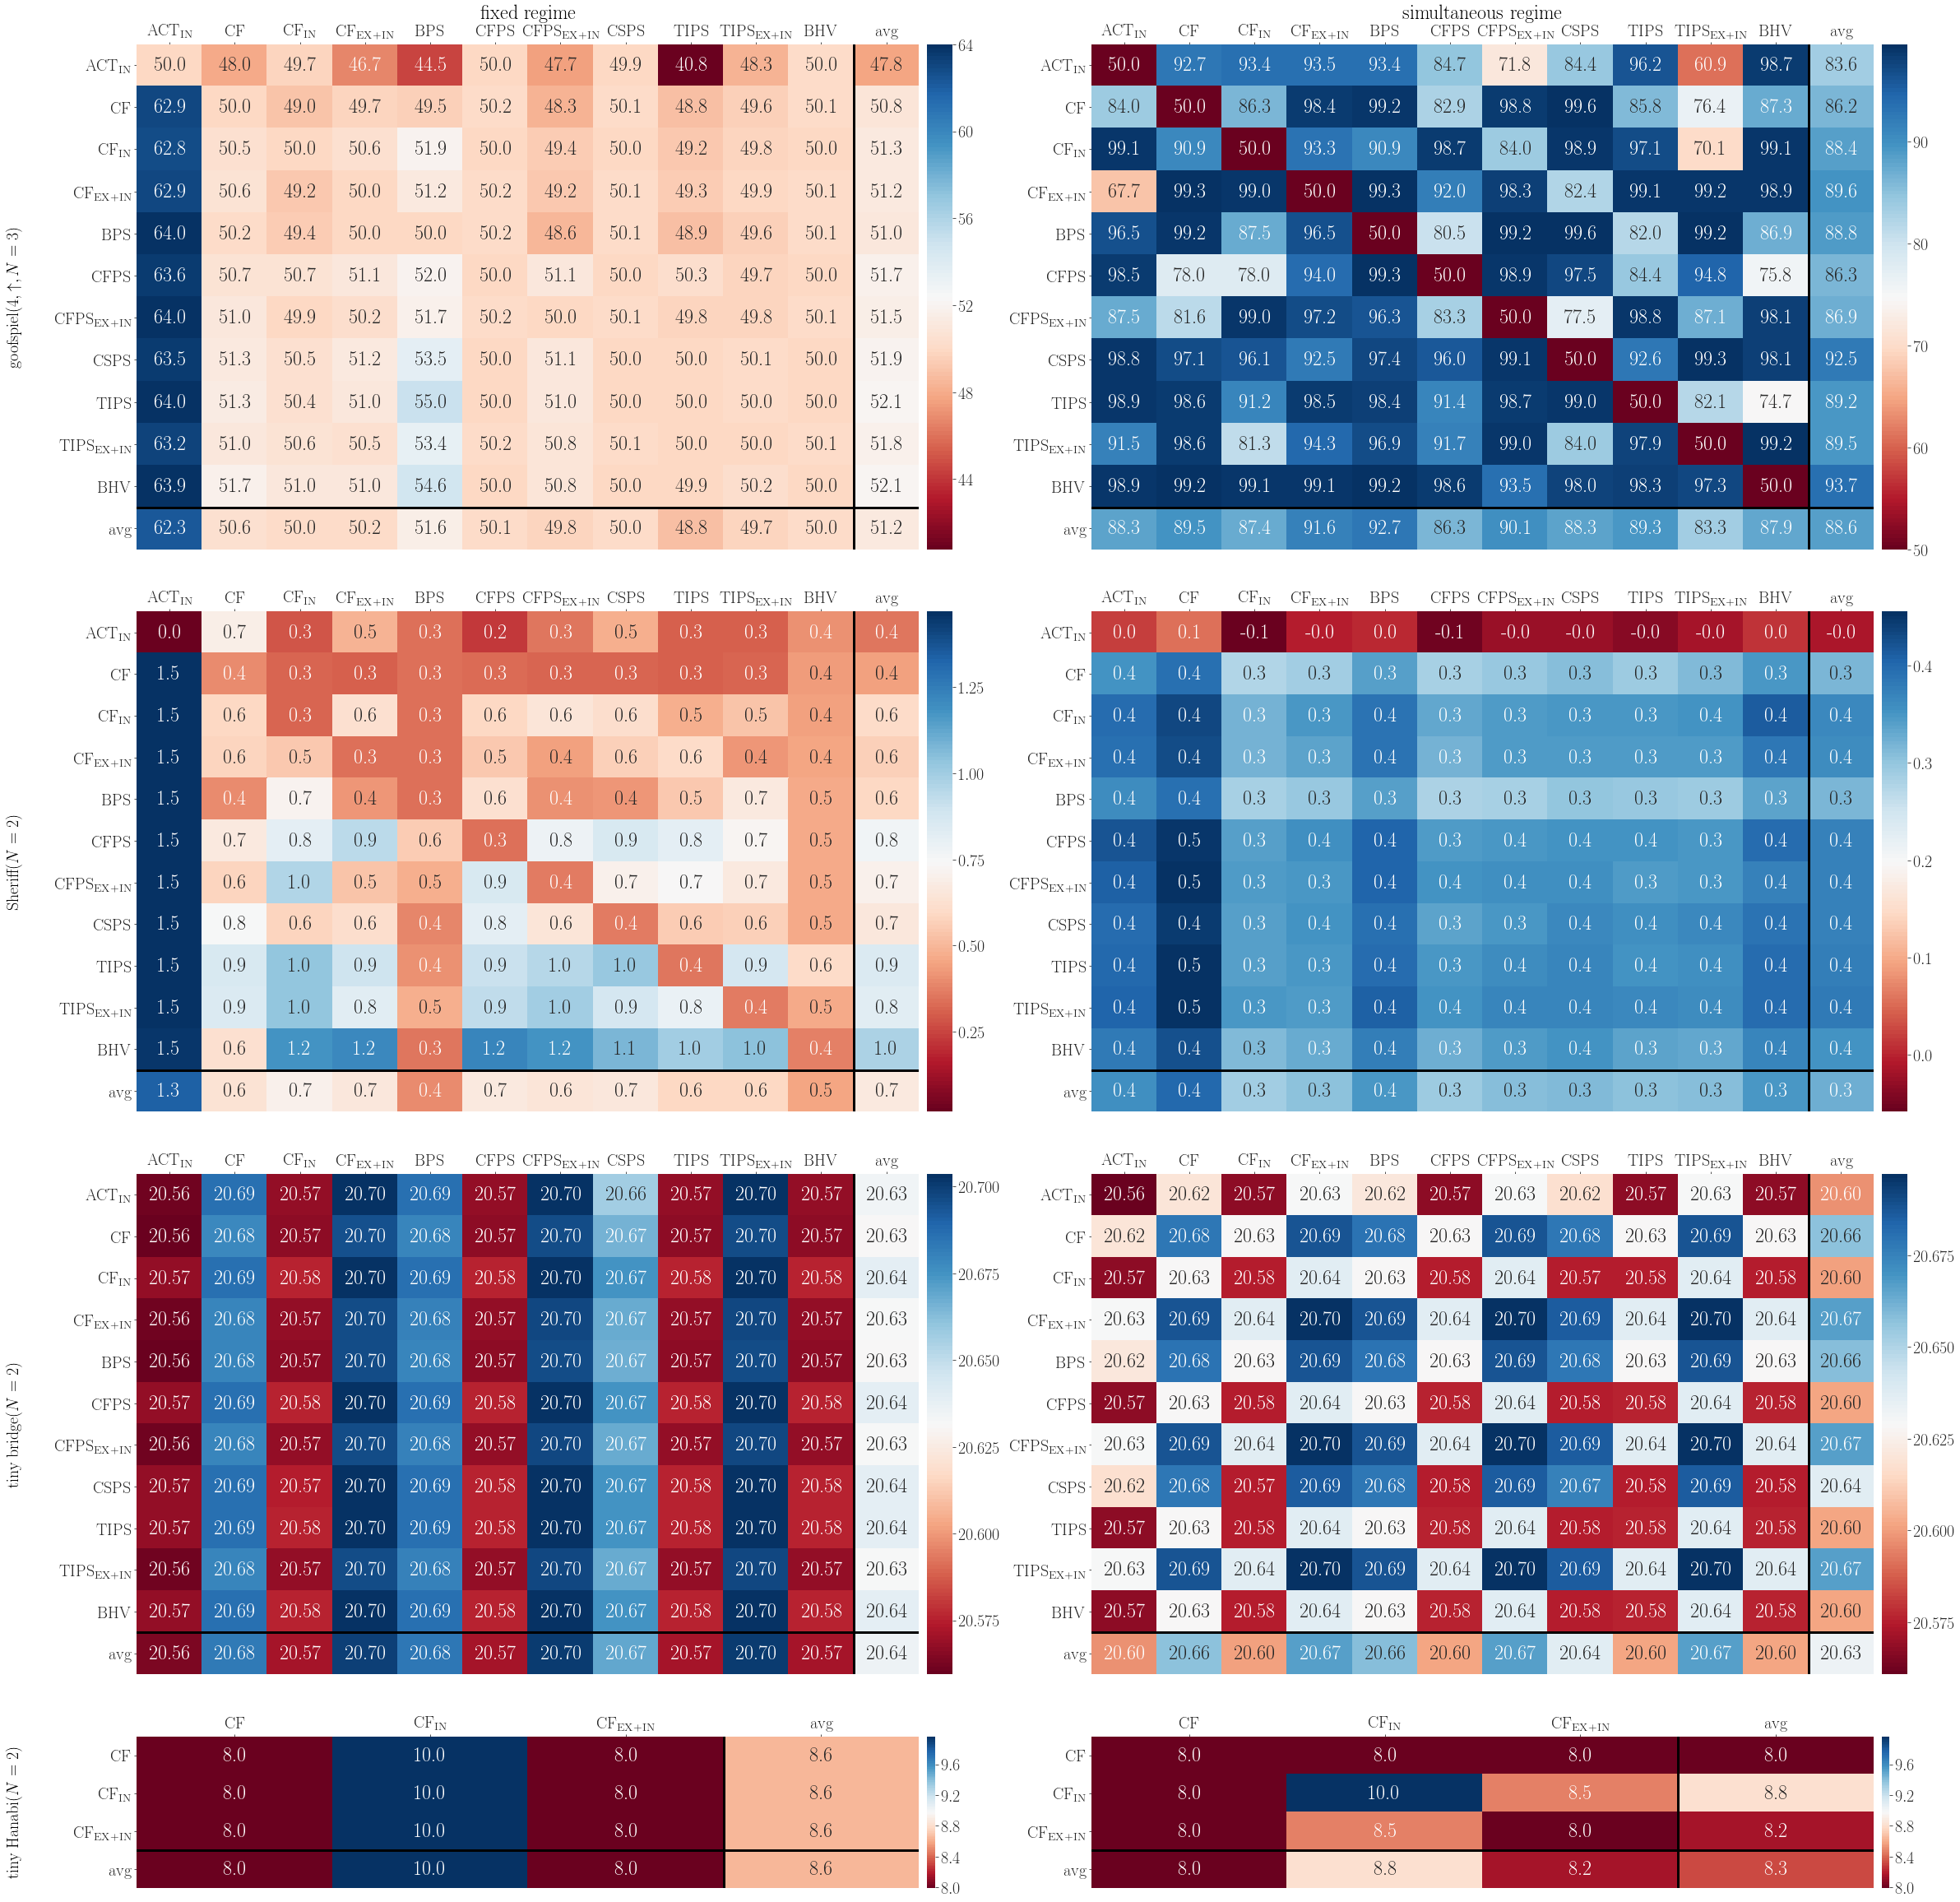

In [31]:
# mcd_plt.set_plt_params(font_size=24)

num_rounds = 501
num_cols = 2
games = data.games()
num_games1 = len(games)
num_games1 = int(np.ceil(num_games1 / 2))
fig, axes_list = plt.subplots(
    num_games1,
    num_cols + 1,
    squeeze=False,
    figsize=(33, 8 * num_games1),
    gridspec_kw={'width_ratios': [0.01, 1, 1], 'height_ratios': [1] + [0.99] * (num_games1 - 1)})
axes_list[0, 1].set_title('fixed regime')
axes_list[0, 2].set_title('simultaneous regime')

num_games2 = int(np.floor(len(games) / 2))
fig2, axes_list2 = plt.subplots(
    num_games2,
    num_cols + 1,
    squeeze=False,
    figsize=(33, 8 * num_games2),
    gridspec_kw={'width_ratios': [0.01, 1, 1], 'height_ratios': [1] + [0.99]*(num_games2 - 2) + [0.3]})
axes_list2[0, 1].set_title('fixed regime')
axes_list2[0, 2].set_title('simultaneous regime')

axes_list = np.concatenate([axes_list, axes_list2], axis=0)
for i, game in enumerate(games):
    print(game)
    axes_list[i, 2].sharex(axes_list[i, 1])
    axes_list[i, 2].sharey(axes_list[i, 1])
#     axes_list[i, 2].yaxis.set_visible(False)

    if game == 'tiny_hanabi':
        _df = data.data.query(
            ' & '.join([
                f'game_tag == "{game}"',
                'mode == "fixed"',
                f't < {num_rounds}',
                f'row_alg == {list(nf_algs)}',
                f'col_alg == {list(nf_algs)}',
            ]))
        _df = _df.pivot(index='t', columns=['row_alg', 'col_alg'],
                        values='value').mean().unstack()
    else:
        _df = mcd_tournament.without_br_row(data.time_avg_fixed_table(game, num_rounds))
        
    fmt = "0.1f"
    if is_leduc(game):
        _df = leduc_score_to_milli_antes(_df)
    elif is_goofspiel(game):
        _df = goofspiel_score_to_win_percentage(_df)
        fmt = "0.1f"
    elif game == 'tiny_bridge':
        fmt = "0.2f"
    
    mcd_tournament.heatmap(
        _df,
        fmt=fmt,
        ax=axes_list[i, 1],
        cmap=div_color_palette,
        cbar_kws={'fraction': 0.05, 'pad': 0.01})
    
    if game == 'tiny_hanabi':
        _df = data.data.query(
            ' & '.join([
                f'game_tag == "{game}"',
                'mode == "sim"',
                f't < {num_rounds}',
                f'row_alg == {list(nf_algs)}',
                f'col_alg == {list(nf_algs)}',
            ]))
        _df = _df.pivot(index='t', columns=['row_alg', 'col_alg'],
                        values='value').mean().unstack()
    else:
        _df = data.time_avg_sim_table(game, num_rounds)
    if is_leduc(game):
        _df = leduc_score_to_milli_antes(_df)
    elif is_goofspiel(game):
        _df = goofspiel_score_to_win_percentage(_df)
    
    mcd_tournament.heatmap(
        _df,
        fmt=fmt,
        ax=axes_list[i, 2],
        cmap=div_color_palette,
        cbar_kws={'fraction': 0.05, 'pad': 0.01})
    
    axes_list[i, 0].axis('off')
    axes_list[i, 0].text(0, 0.5, mcd_tournament.game_label(game),
                         horizontalalignment='left',
                         verticalalignment='center',
                         rotation=90,
                         transform=axes_list[i, 0].transAxes)
fig.tight_layout(pad=0.1)
fig.subplots_adjust(wspace=0.22, hspace=0.15)
fig.savefig(f'../results/heatmaps.{date}-1.pdf')

fig2.tight_layout(pad=0.1)
fig2.subplots_adjust(wspace=0.22, hspace=0.15)
fig2.savefig(f'../results/heatmaps.{date}-2.pdf')

# mcd_plt.set_plt_params(font_size=20)

In [7]:
_algs = [
    'A-CFR_IN',
    'CFR',
    'CFR_IN',
    'BPS-CFR',
    'CFPS-CFR',
    'CSPS-CFR',
    'TIPS-CFR',
    'BEHAV-CFR',
]
_alg_label_map = {
    'CFR': r'\textsc{cf}',
    'CFR_IN': r'\textsc{cf}\textsubscript{\INT}',
    'A-CFR_IN': r'\textsc{act}\textsubscript{\INT}',
    'CSPS-CFR': r'\textsc{csps}',
    'CFPS-CFR': r'\textsc{cf}',
    'TIPS-CFR': r'\textsc{tips}',
    'BPS-CFR': r'\textsc{bps}',
    'BEHAV-CFR': r'\textsc{bhv}',
}

def alg_labels(alg_tags):
    return [
      _alg_label_map[tag]
      for tag in alg_tags
    ]

def alg_sort_key(tag):
  return _algs.index(tag)


def alg_sort_keys(tags):
  return pd.Index([alg_sort_key(tag) for tag in tags], name=tags.name)


def with_sorted_algs(df):
  return df.sort_index(axis=0, key=alg_sort_keys)

In [8]:
fmt = r'{:.0%}\%'
num_rounds = 500

In [20]:
_game_tags = [
    'goofspiel_ascending',
    'goofspiel_ascending_3p',
]
_modes = [
    'fixed',
    'sim',
]
_qs = ' & '.join(
    [
        f'game_tag == {list(_game_tags)}',
        f'mode == {list(_modes)}',
        f't < {num_rounds}',
        f'row_alg == {list(_algs)}',
        f'col_alg == {list(_algs)}'
    ]
)
_df = data.data.query(_qs)
_df = _df.pivot(
    index=['t', 'col_alg'],
    columns=['row_alg', 'mode', 'game_tag'],
    values='value'
).mean().unstack(level=[1, 2])
_df = with_sorted_algs(_df)
_df = _df.sort_index(axis='columns', level=1, key=(
    lambda x: pd.Index([_game_tags.index(y) for y in x], name=x.name)
))
_df = goofspiel_score_to_win_percentage(_df)
_df.index = pd.Index(alg_labels(_df.index))
print(_df.to_string(
    formatters=(
        ' & {:.0f}'.format,
        ' & {:.0f}'.format,
        ' & {:.0f}'.format,
        ' & {:.0f}'.format,
    )
))

mode                                           fixed                 sim                  fixed                    sim
game_tag                         goofspiel_ascending goofspiel_ascending goofspiel_ascending_3p goofspiel_ascending_3p
\textsc{act}\textsubscript{\INT}                & 52                & 46                   & 48                   & 87
\textsc{cf}                                     & 56                & 50                   & 51                   & 84
\textsc{cf}\textsubscript{\INT}                 & 57                & 50                   & 52                   & 91
\textsc{bps}                                    & 58                & 51                   & 52                   & 85
\textsc{cf}                                     & 59                & 51                   & 52                   & 83
\textsc{csps}                                   & 60                & 51                   & 52                   & 91
\textsc{tips}                                   

## Figure for HR-DT presentation

In [14]:
_algs = [
    'A-CFR_IN',
    'CFR',
    'TIPS-CFR',
]
_alg_label_map = {
    'CFR': r'CFR',
    'A-CFR_IN': r'$\approx$PGPI',
#     A-CFR\textsubscript{IN}',
    'TIPS-CFR': r'EFR',
}
data = mcd_tournament.Data.load()
data.data = data.data.query(f'col_alg == {list(_algs)} & row_alg == {list(_algs)}')

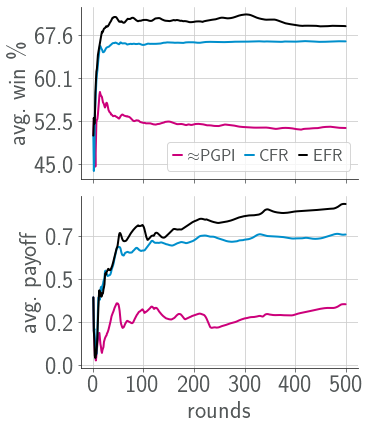

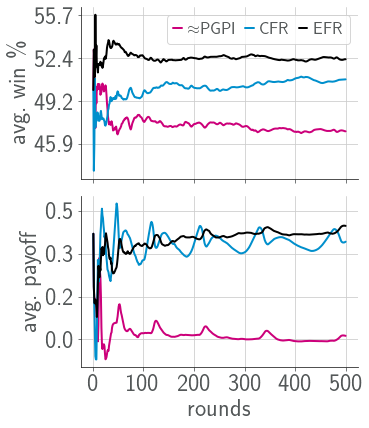

In [16]:
charcoal = '#545859'
mcd_plt.set_plt_params(font_size=24, use_serif=False, color=charcoal)

_alg_color = {k: v for k, v in alg_color.items()}
_alg_color['TIPS-CFR'] = 'black'

ylim_by_game = {}
games = ['goofspiel_ascending', 'sheriff']
modes = ['fixed', 'sim']
for mode in modes:
    fig, axes_list = learning_curves_subplots(games, [_algs])
    for i, game_tag in enumerate(sorted(games, key=mcd_tournament.game_sort_key)):
        sharex_and_y_in_row(axes_list[i, :])
        for j, alg_group in enumerate([_algs]):
            ax = axes_list[i, j]
            _df = learning_curve_data(
                data.data.query(
                    learning_curve_query_string.format(
                        game=game_tag,
                        mode=mode,
                        algs=alg_group,
                        col_algs=list(_algs))))
            if is_goofspiel(game_tag):
                _df = goofspiel_learning_curve_config(_df, ax, j)
            elif j == 0:
                ax.set_ylabel(avg_learning_curve_ylabel)
            for alg in _df.columns:
                ax.plot(
                    _df.index.to_numpy() + 1.0,
                    _df[alg],
                    lw=2,
                    alpha=1,
                    label=_alg_label_map[alg],
                    color=_alg_color[alg]
                )
            if game_tag in ylim_by_game:
                ax.set_ylim(ylim_by_game[game_tag])
            ax.yaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%0.1f'))
            ax.xaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%d'))
            ax.grid("on")
            ax.tick_params(colors=charcoal)
        for ax in axes_list[i, :]:
            learning_curves_set_ticks(ax)
    learning_curves_legend(axes_list[0, 0], ncol=3)
    axes_list[0, 0].set_xticklabels([])
    axes_list[-1, 0].set_xlabel('rounds')
    plt.tight_layout(pad=0.1)
    plt.subplots_adjust(wspace=0, hspace=0.1)
    sns.despine()
    plt.savefig(f'../results/learning_curves_hr_dt.{mode}.{date}.pdf', transparent=True)